0.004


<ipython-input-23-dab113e157eb>:139: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-23-dab113e157eb>:140: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



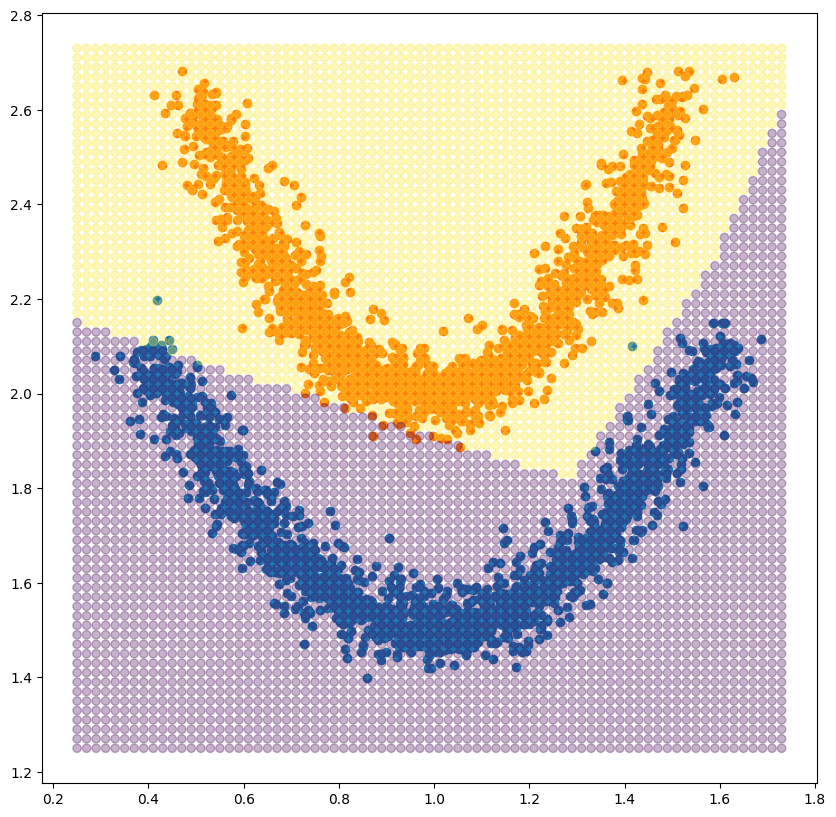

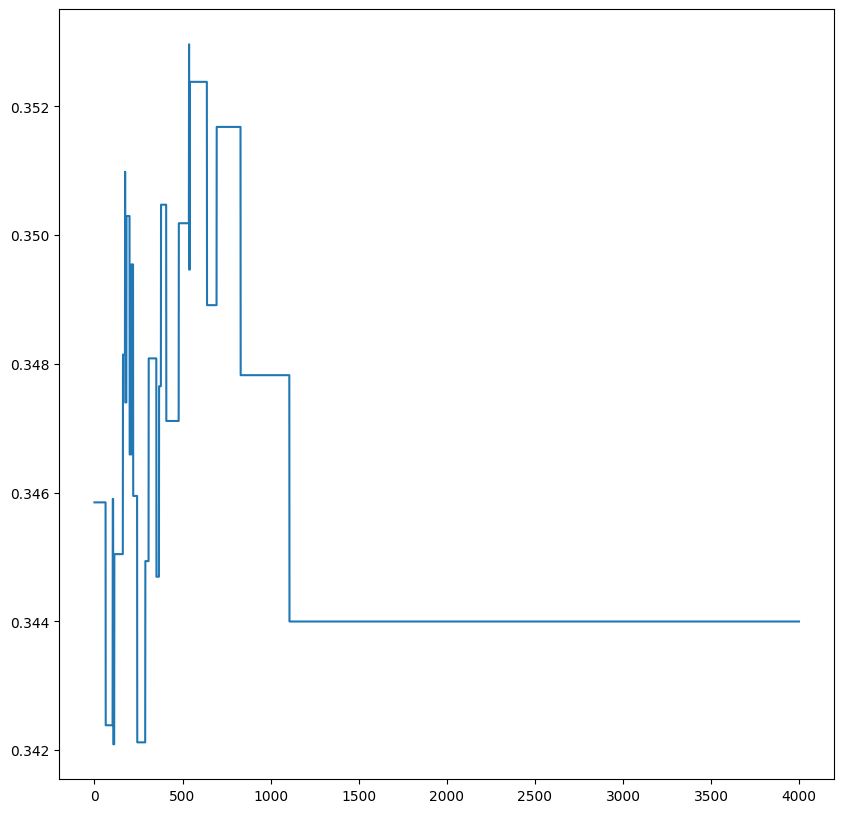

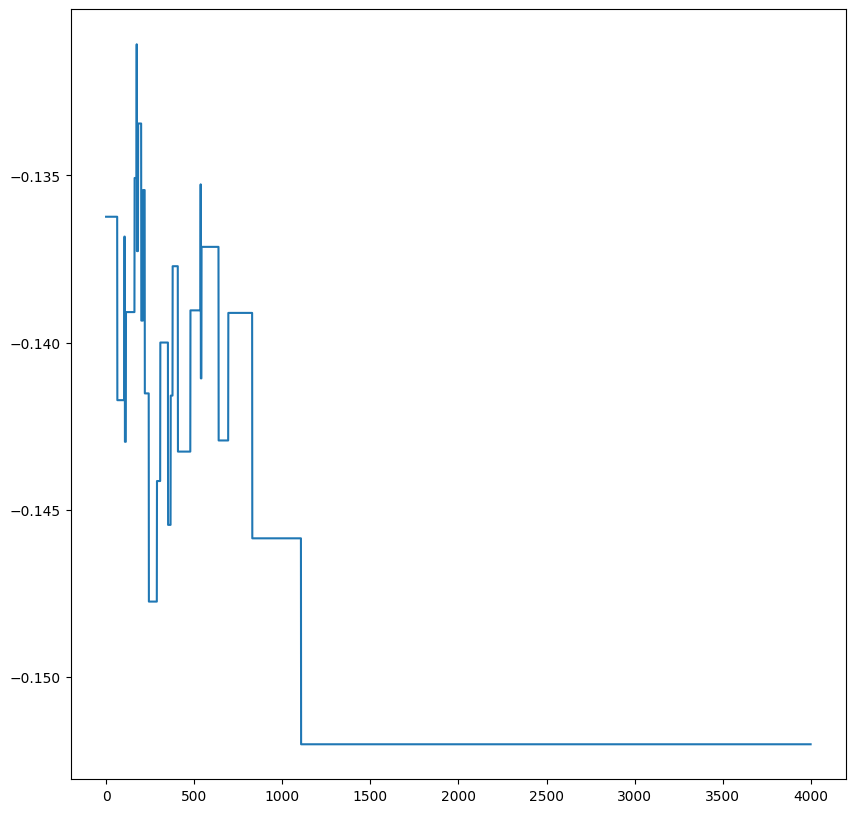

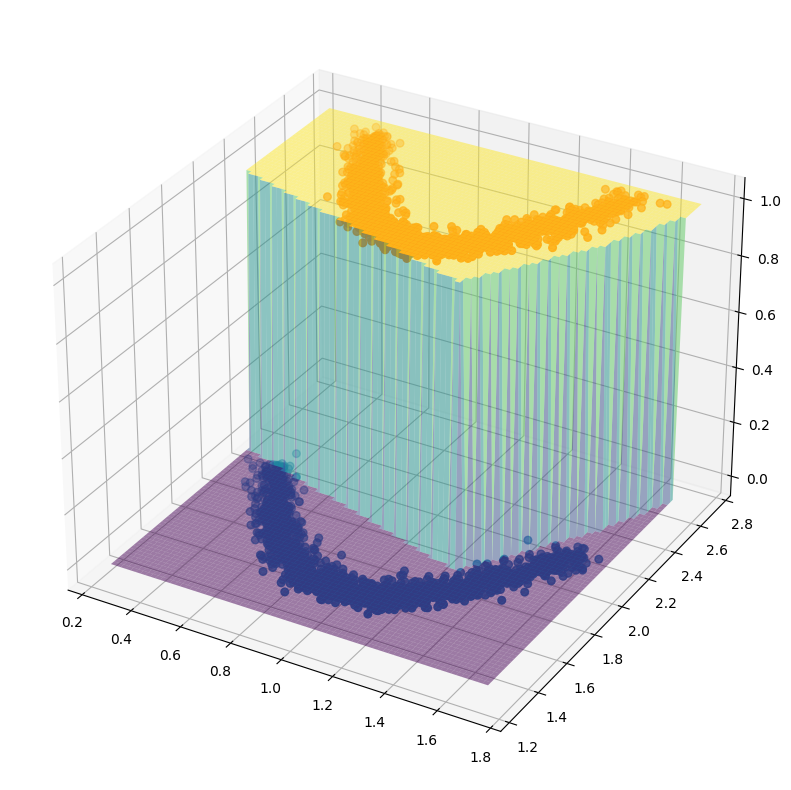

In [ ]:
"""Create two clusters of points in R2, each with 2000 points, that are separated by a
parabolic boundary. Design a 2/3-1 neural network with rectilinear activating functions (AF) to classify these
points by finding the optimal parameter values using the back propagation algorithm on 1000 randomly
selected points. Use another 2000 randomly selected points to test the neural network. Repeat the run of
the back propagation algorithm until the error rate is less than 0.05. Plot the cluster of points in a 2-D
plot and indicate the decision boundary in the input space created by the output neuron by shading with
different colors. Use a 3-D plot to show the two clusters and the separating plane"""

##########################################################################
############################ PyCode 6.6.1 ################################
##########   Parabolic clusters and a 2-2-1 Neural Network  ##############

import plotly.graph_objects as go
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#######################   Parabolic clusters   ###########################
#####################  Synthetic Data Creation   #########################

nData=2000    # number of points in each cluster
nTrain=1000
nEpoch=4   # number of training points
nTest=2000    # number of test points
alpha=0.01   # step size (learning rate)

std=0.5       # standard deviation of the distance of points
x=np.zeros((2*nData,2))      # pre-allocate for the input and the
t=np.zeros((2*nData))        # target vector.
r=np.random.normal(0,std,2*nData);
the=2*np.pi*np.random.rand(2*nData);
w11f=np.zeros(nEpoch*nTrain)
w12f=np.zeros(nEpoch*nTrain)


h=-6+12*np.random.rand(nData)
v=5+(h**2)/6
x[0:nData,0]=h + r[0:nData]*np.cos(the[0:nData])
x[0:nData,1]=v + r[0:nData]*np.sin(the[0:nData])
t[0:nData]=0

h=-5+10*np.random.rand(nData)
v=10+(h**2)/4
x[nData:2*nData,0]=h + r[nData:2*nData]*np.cos(the[nData:2*nData])
x[nData:2*nData,1]=v + r[nData:2*nData]*np.sin(the[nData:2*nData])
t[nData:2*nData]=1


#######################  Normalization   ################################
x[:,0]=1 + 0.1*x[:,0]
x[:,1]=1 + 0.1*x[:,1]

"""#######################  Interactive plot to see what h and v are about  ####################
goFig=go.Figure(data=go.Scatter(x=x[0:nData,0],y=x[0:nData,1],mode='markers'))
goFig.add_trace(go.Scatter(x=x[nData:2*nData,0], y=x[nData:2*nData,1],mode='markers'))
#goFig.add_trace(go.Scatter(x=h, y=v,mode='markers'))
goFig.show()"""

################# Parameter Intialization    ############################
#########################################################################
w11=0.5-np.random.rand(); w12=0.5-np.random.rand() #2/2-1
w21=0.5-np.random.rand(); w22=0.5-np.random.rand()
b2=0.5-np.random.rand(); b1=0.5-np.random.rand()
ww1=0.5-np.random.rand(); ww2=0.5-np.random.rand()
bb=0.5-np.random.rand()

a=range(0,2*nData)
sp=random.sample(a,nTrain+nTest) # indexes for random selection of data fo
                                 #  training and testing

########################### Training #####################################
#########################################################################
p=0
for epoch in range(0, nEpoch):
    for i in range(0,nTrain):
        y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
        y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
        dxx1=y1>0;
        xx1=y1*dxx1;
        dxx2=y2>0;
        xx2=y2*dxx2     #  rect. activation
        yy = bb + ww1*xx1 + ww2*xx2
        yy=yy>0
        e = t[sp[i]] - yy

        ww1=ww1 + alpha*e*xx1;
        ww2=ww2 + alpha*e*xx2;
        bb=bb + alpha*e
        w11=w11 + alpha*e*ww1*dxx1*x[sp[i],0]
        w12=w12 + alpha*e*ww1*dxx1*x[sp[i],1]
        w21=w21 + alpha*e*ww2*dxx2*x[sp[i],0]
        w22=w22 + alpha*e*ww2*dxx2*x[sp[i],1]
        b1=b1 + alpha*e*ww1*dxx1;  b2=b2 + alpha*e*ww2*dxx2

        w11f[p]=w11; w12f[p]=w12;
        p=p+1

########################  Testing  ######################################
#########################################################################
er=0
for i in range(nTrain,nTrain+nTest):
    y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
    y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
    dxx1=y1>0; xx1=y1*dxx1;  dxx2=y2>0; xx2=y2*dxx2     #  rect. activation
    yy = bb + ww1*xx1 + ww2*xx2
    yy=yy>0
    e = abs(t[sp[i]] - yy)
    er=er+e #error is accumulated over the testing phase
er=er/nTest #average error is taken over testing range

print(er)

##########################  Plotting Part  #####################################

if er < 0.07:
    plt.figure(figsize=(10,10))
    plt.scatter(x[0:nData,0], x[0:nData,1])
    plt.scatter(x[nData:2*nData,0], x[nData:2*nData,1])


    X = np.arange(0.25, 1.75, 0.02)
    Y = np.arange(1.25, 2.75, 0.02)
    X, Y = np.meshgrid(X, Y)
    y1 = b1 + w11*X + w12*Y
    y2 = b2 + w21*X + w22*Y
    dxx1=y1>0; xx1=y1*dxx1;  dxx2=y2>0; xx2=y2*dxx2     #  rect. activation
    yy = bb + ww1*xx1 + ww2*xx2
    Z=yy>0
    plt.scatter(X, Y, c=Z+1, alpha=0.3)

    plt.figure(figsize=(10,10))
    f=np.arange(0,nEpoch*nTrain,1)
    plt.plot(f,w11f)
    plt.figure(figsize=(10,10))
    plt.plot(f,w12f)
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter(x[0:nData,0], x[0:nData,1], 0,  cmap='viridis', s=30)
    ax.scatter(x[nData:2*nData,0], x[nData:2*nData,1], 1,  cmap='viridis', s=30)

    #  ploting the separating planes
    X = np.arange(0.25, 1.75, 0.02)       # Shorter X-range for visibility
    Y = np.arange(1.25, 2.75, 0.02)
    X, Y = np.meshgrid(X, Y)
    y1 = b1 + w11*X + w12*Y
    y2 = b2 + w21*X + w22*Y
    dxx1=y1>0;
    xx1=y1*dxx1;
    dxx2=y2>0;
    xx2=y2*dxx2     #  rect. activation
    yy = bb + ww1*xx1 + ww2*xx2
    Z=yy>0
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', alpha=0.5)




In [ ]:
nZ=np.zeros((np.shape(yy)[0],np.shape(yy)[1]))
nZ[yy>0]=1

#######################  Interactive plot to see what h and v are about  ####################
goFig2=go.Figure(data=go.Surface(x=X,y=Y,z=nZ))
goFig2.add_trace(go.Scatter3d(x=x[0:nData,0], y=x[0:nData,1],z=t[0:nData],mode='markers'))
goFig2.add_trace(go.Scatter3d(x=x[nData:2*nData,0], y=x[nData:2*nData,1],z=t[nData:2*nData],mode='markers'))
goFig2.update_layout(title='2/2-1 NN',scene=dict(xaxis_title='X', yaxis_title='Y',zaxis_title='Output Z'),width=700, height=700)
#goFig.add_trace(go.Scatter(x=h, y=v,mode='markers'))
goFig2.show()

In [ ]:
np.shape(yy)[0]

75